# import packages

In [1]:
import eda_plots as ep
import eda_functions as eda_fn
import pandas as pd

# read training csv file

In [2]:
df = pd.read_csv("../../input/train.csv")
df["count"]=1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


# count target variable
* training set has 61.6% of records with not-survived and 38.3% of records with survived.

In [3]:
df_vc = pd.concat([df.Survived.value_counts(normalize=True),
                df.Survived.value_counts()], 
                axis=1,
                keys=('perc','count'))
#df["Survived"].value_counts()
df_vc

,perc,count
Survived,,
0,0.616162,549
1,0.383838,342


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'count'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
count            int64
dtype: object

In [8]:
# check number of missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
count            0
dtype: int64

# plots

## Pclass

In [9]:
eda_fn.summary(df,"Pclass")

unique number count of Pclass : 3

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


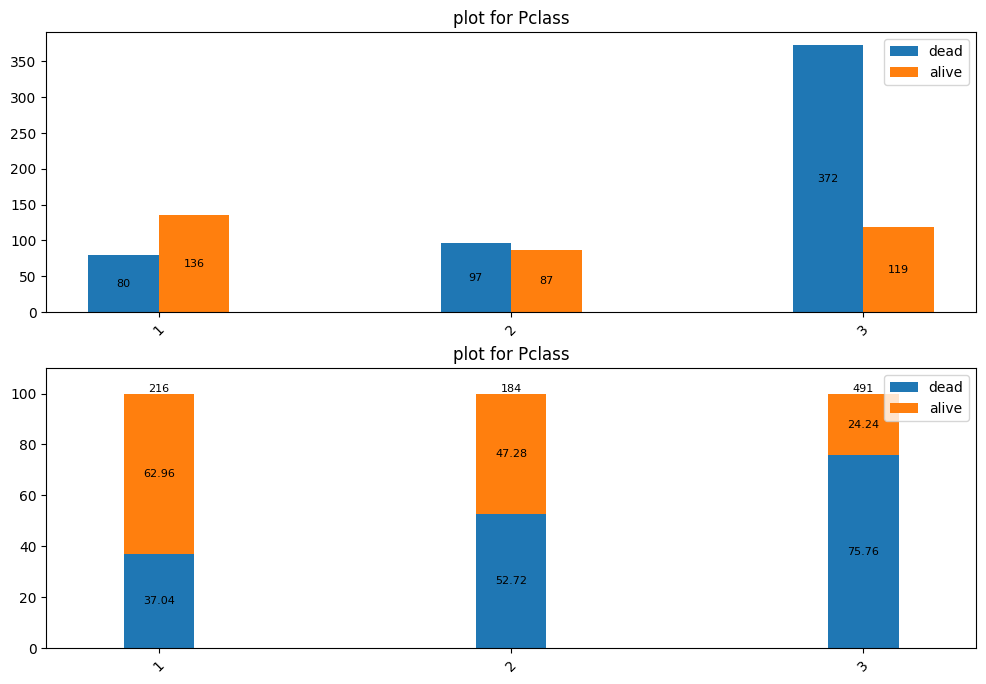

In [10]:
ep.agg_plot(df,"Pclass")

## Name (& title)

In [11]:
eda_fn.summary(df,"Name")

unique number count of Name : 891

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [14]:
df["last_name"] = df["Name"].apply(lambda x: x.split(',')[0].strip())
eda_fn.summary(df,"last_name")

unique number count of last_name : 667

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: last_name, Length: 891, dtype: object


In [29]:
title_list = ["Mr.","Miss.","Mrs.","Master.", "Dr.", "Rev."]

def extract_title(name):
    for title in title_list:
        if title in name:
            return title
    return "etc"

df["title"] = df["Name"].apply(lambda x: extract_title(x))
df.loc[df["title"].isna(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,last_name,title


In [30]:
eda_fn.summary(df,"title")

unique number count of title : 7

title
Dr.          7
Master.     40
Miss.      182
Mr.        517
Mrs.       125
Rev.         6
etc         14
Name: count, dtype: int64


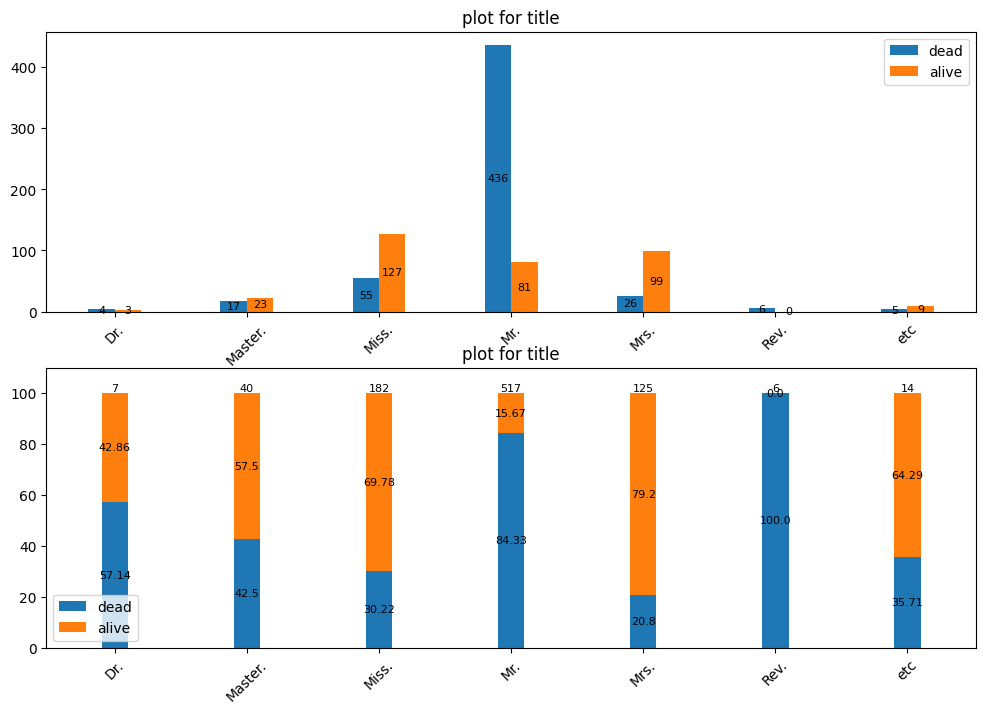

In [31]:
ep.agg_plot(df,"title")

## Sex

In [18]:
eda_fn.summary(df,"Sex")

unique number count of Sex : 2

Sex
female    314
male      577
Name: count, dtype: int64


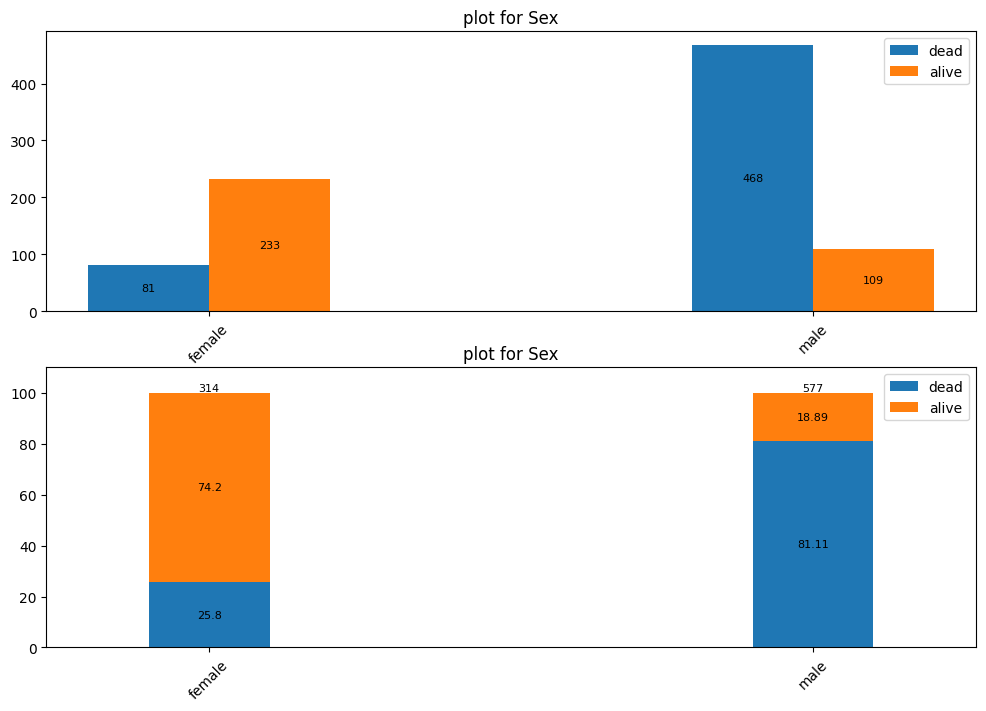

In [19]:
ep.agg_plot(df,"Sex")

## Age
* missing ages should be handled

### 

In [20]:
eda_fn.summary(df,"Age")

unique number count of Age : 89

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [15]:
bins = [0,5,10,20,30,40,50,60,70,80,90,100]
df["Age_grp"] = pd.cut(df["Age"], bins=bins, include_lowest=True)
eda_fn.summary(df,"Age_grp")

unique number count of Age_grp : 10

Age_grp
(-0.001, 5.0]     44
(5.0, 10.0]       20
(10.0, 20.0]     115
(20.0, 30.0]     230
(30.0, 40.0]     155
(40.0, 50.0]      86
(50.0, 60.0]      42
(60.0, 70.0]      17
(70.0, 80.0]       5
(80.0, 90.0]       0
(90.0, 100.0]      0
NaN              177
Name: count, dtype: int64


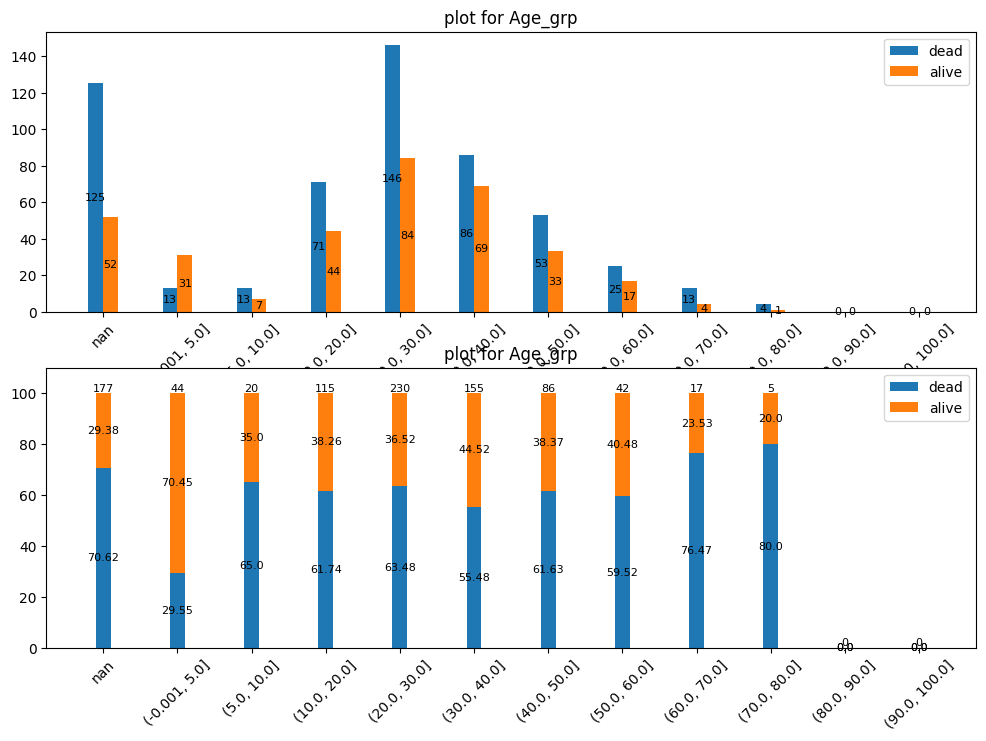

In [16]:
ep.agg_plot(df,"Age_grp")

In [35]:
age_reference_df = df[["Pclass","Sex","title","Age","count"]].groupby(["Pclass","Sex","title"]).agg({"count":"sum","Age":["mean"]}).reset_index()
age_reference_df.columns = [c[0] + "_" + c[1] for c in age_reference_df.columns]
age_reference_df

,Pclass_,Sex_,title_,count_sum,Age_mean
0,1,female,Dr.,1,49.000000
1,1,female,Miss.,46,30.000000
2,1,female,Mrs.,42,40.882353
3,1,female,etc,5,30.600000
4,1,male,Dr.,4,42.000000
5,1,male,Master.,3,5.306667
6,1,male,Mr.,107,41.580460
7,1,male,etc,8,51.250000
8,2,female,Miss.,34,22.390625
9,2,female,Mrs.,41,33.682927


In [112]:
#age_reference_df.loc[(age_reference_df["Pclass_"]==1)&(age_reference_df["Sex_"]=="female")&(age_reference_df["title_"]=="Dr."),"Age_mean"][0]

def age_imputation(cols):
    Pclass = cols["Pclass"]
    Sex = cols["Sex"]
    title = cols["title"]
    Age = cols["Age"]
    value = age_reference_df.loc[(age_reference_df["Pclass_"]==Pclass)&(age_reference_df["Sex_"]==Sex)&(age_reference_df["title_"]==title),"Age_mean"]
    if pd.isnull(Age):
        if len(value) == 1:
            return value.item()
        else:
            return Age
    else:
        return Age



In [115]:
df["Age_New"] = df[["Pclass","Sex","title","Age"]].apply(age_imputation,axis=1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,last_name,title,Age_New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund,Mr.,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Cumings,Mrs.,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Heikkinen,Miss.,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Futrelle,Mrs.,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Allen,Mr.,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Montvila,Rev.,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Graham,Miss.,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,Johnston,Miss.,16.123188
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Behr,Mr.,26.000000


In [116]:
bins = [0,5,10,20,30,40,50,60,70,80,90,100]
df["Age_New_grp"] = pd.cut(df["Age_New"], bins=bins, include_lowest=True)
eda_fn.summary(df,"Age_New_grp")

unique number count of Age_New_grp : 9

Age_New_grp
(-0.001, 5.0]     44
(5.0, 10.0]       24
(10.0, 20.0]     148
(20.0, 30.0]     323
(30.0, 40.0]     173
(40.0, 50.0]     115
(50.0, 60.0]      42
(60.0, 70.0]      17
(70.0, 80.0]       5
(80.0, 90.0]       0
(90.0, 100.0]      0
Name: count, dtype: int64


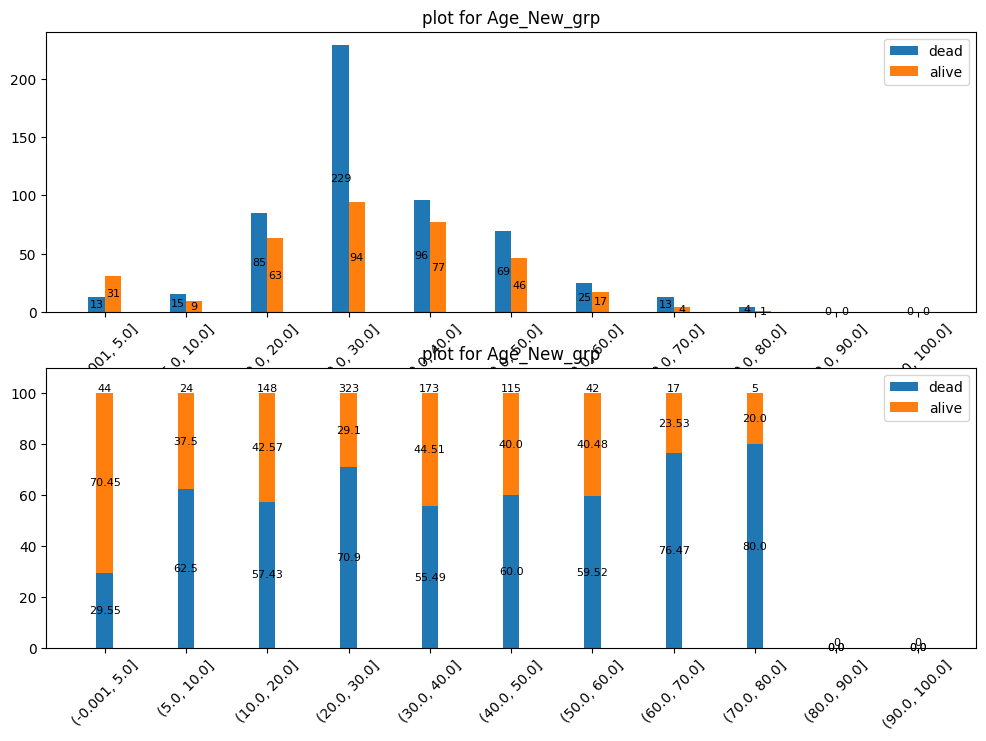

In [117]:
ep.agg_plot(df,"Age_New_grp")

## SibSp

In [17]:
eda_fn.summary(df,"SibSp")

unique number count of SibSp : 7

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


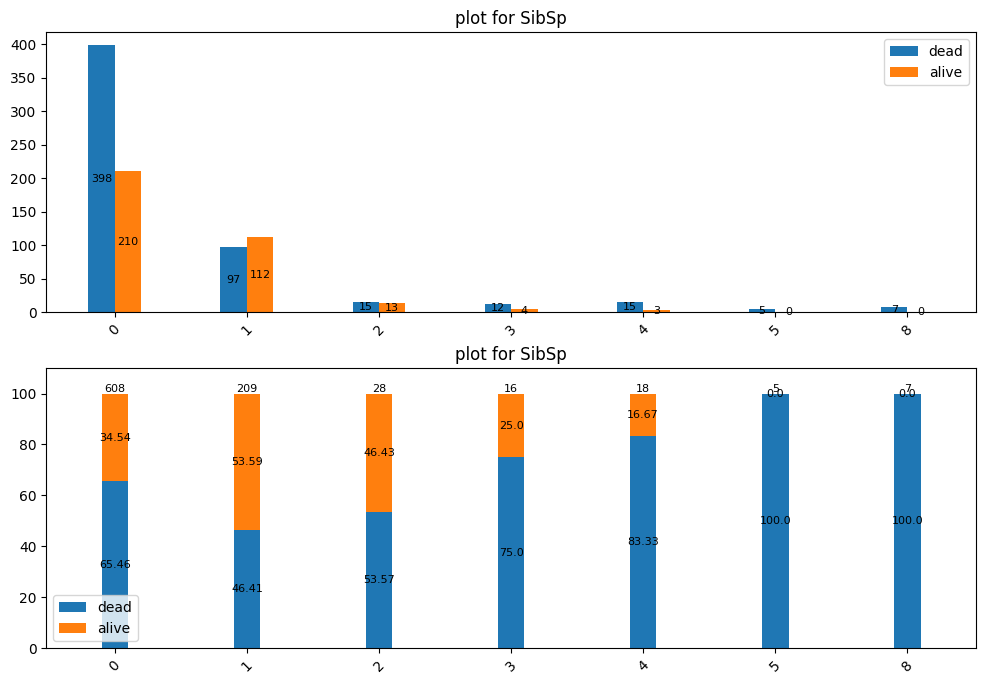

In [18]:
ep.agg_plot(df,"SibSp")

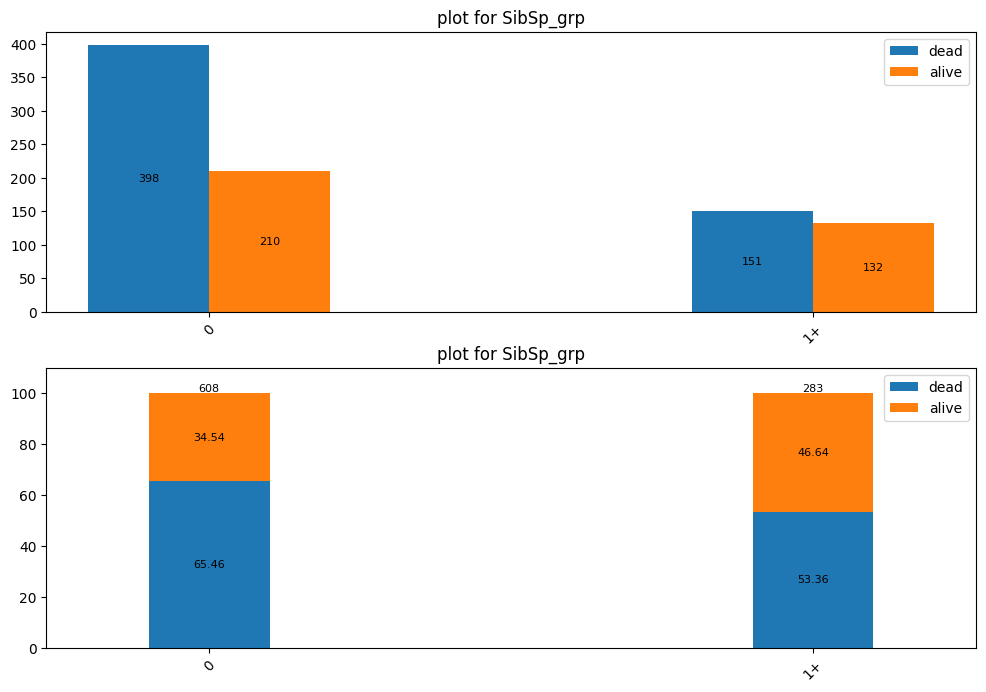

In [19]:
bins = [-1,0.5,100]
labels = ["0", "1+"]
df["SibSp_grp"] = pd.cut(df["SibSp"], bins=bins, labels = labels, include_lowest=True)
ep.agg_plot(df,"SibSp_grp")

## Parch

In [20]:
eda_fn.summary(df,"Parch")

unique number count of Parch : 7

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


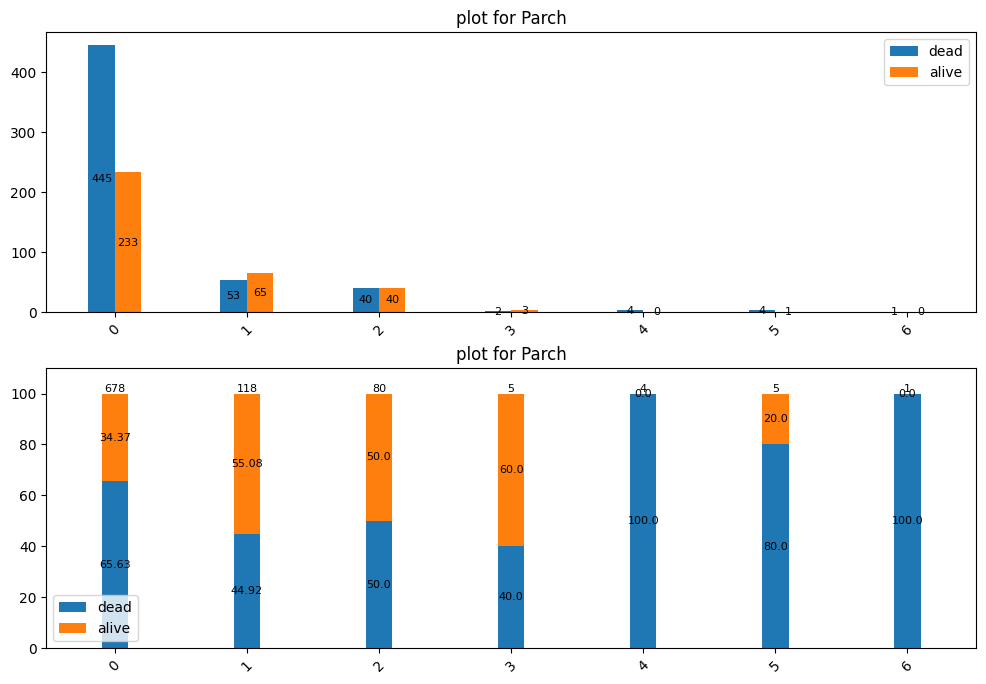

In [21]:
ep.agg_plot(df,"Parch")

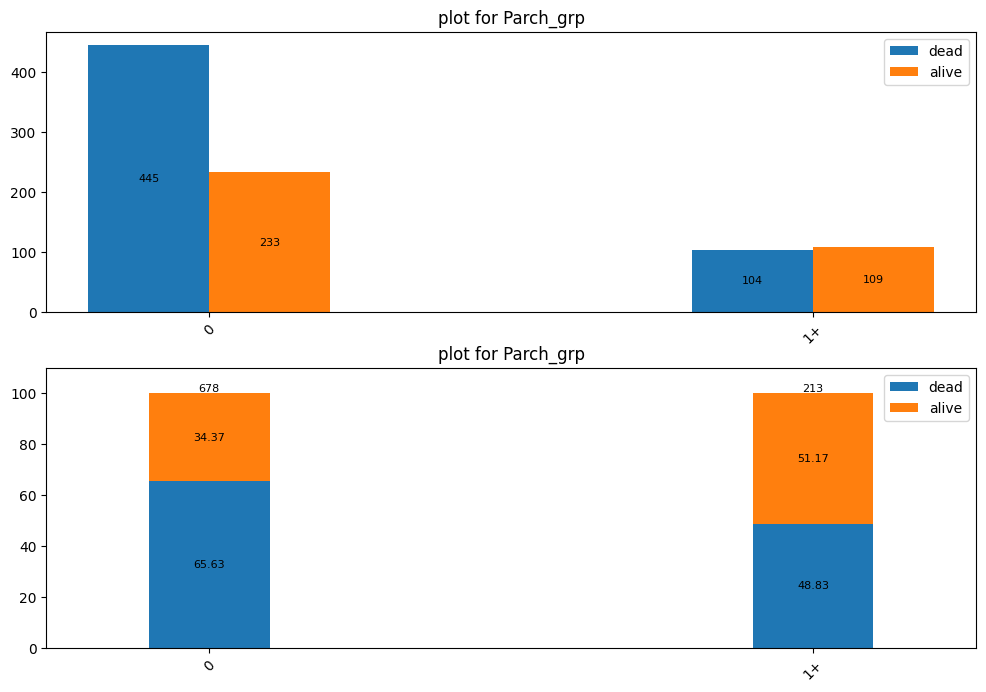

In [22]:
bins = [0,0.5,100]
labels = ["0", "1+"]
df["Parch_grp"] = pd.cut(df["Parch"], bins=bins, labels = labels, include_lowest=True)

ep.agg_plot(df,"Parch_grp")

## relatives

In [23]:
df["relatives"] = df["SibSp"] + df["Parch"]
eda_fn.summary(df,"relatives")

unique number count of relatives : 9

relatives
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


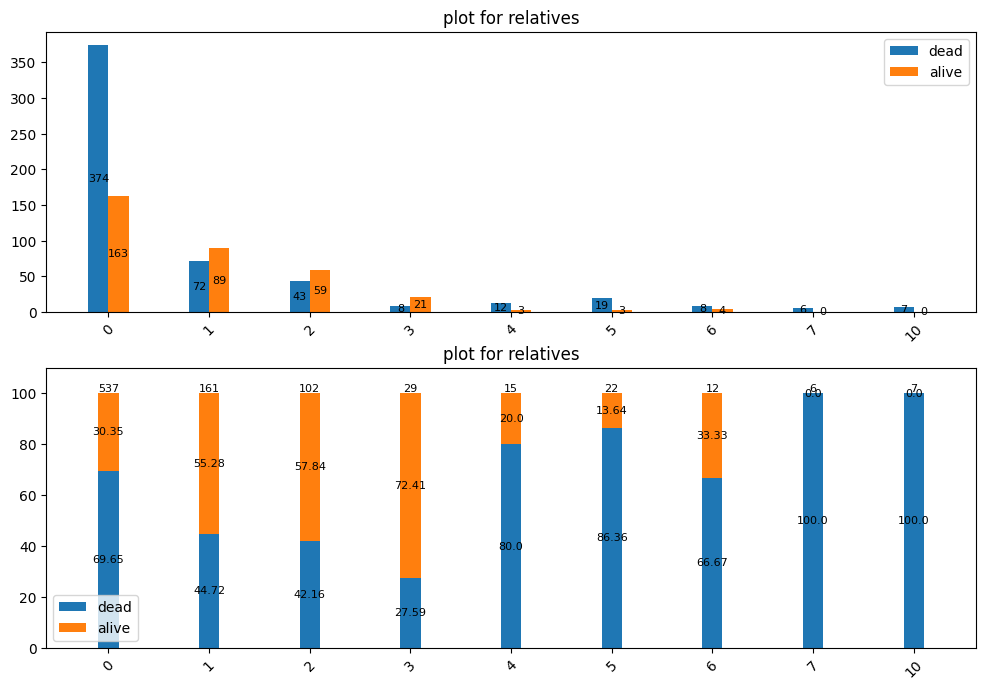

In [24]:
ep.agg_plot(df,"relatives")

## alone
* check if there is no family aboard

In [25]:
df.loc[df["SibSp"] + df["Parch"] == 0, "alone"] = "Yes"
df.loc[df["SibSp"] + df["Parch"] > 0, "alone"] = "No"
eda_fn.summary(df,"alone")

unique number count of alone : 2

alone
No     354
Yes    537
Name: count, dtype: int64


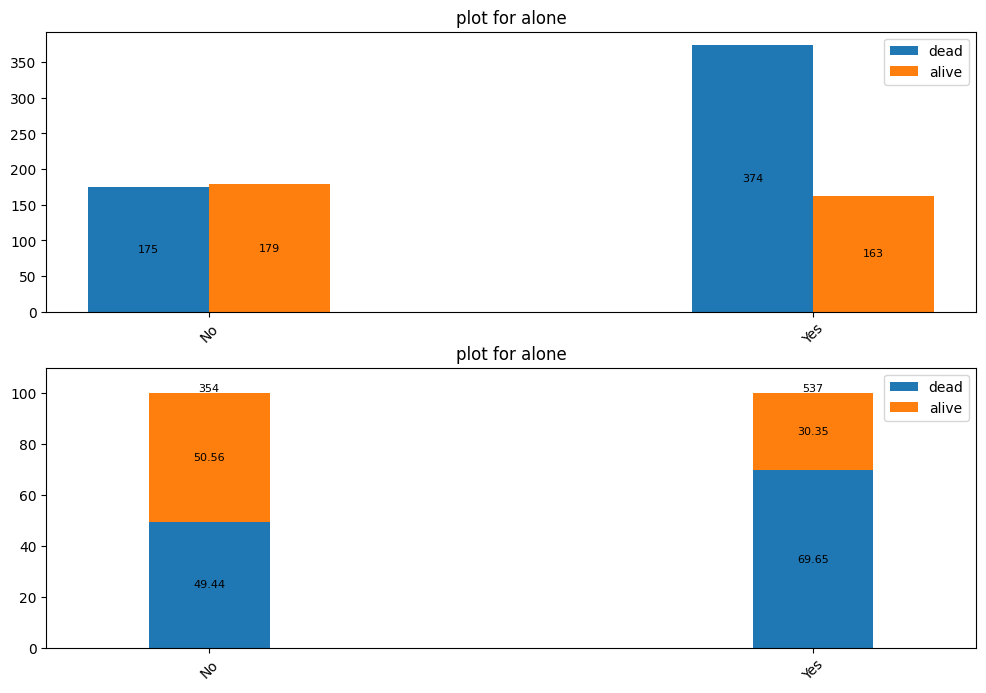

In [26]:
ep.agg_plot(df,"alone")

## Ticket

In [27]:
eda_fn.summary(df,"Ticket")

unique number count of Ticket : 681

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object


## Fare

In [28]:
bins = [0,10,20,30,40,50,100,600]
df["Fare_grp"] = pd.cut(df["Fare"], bins=bins, include_lowest=True)
eda_fn.summary(df,"Fare_grp")


unique number count of Fare_grp : 7

Fare_grp
(-0.001, 10.0]    336
(10.0, 20.0]      179
(20.0, 30.0]      142
(30.0, 40.0]       58
(40.0, 50.0]       16
(50.0, 100.0]     107
(100.0, 600.0]     53
Name: count, dtype: int64


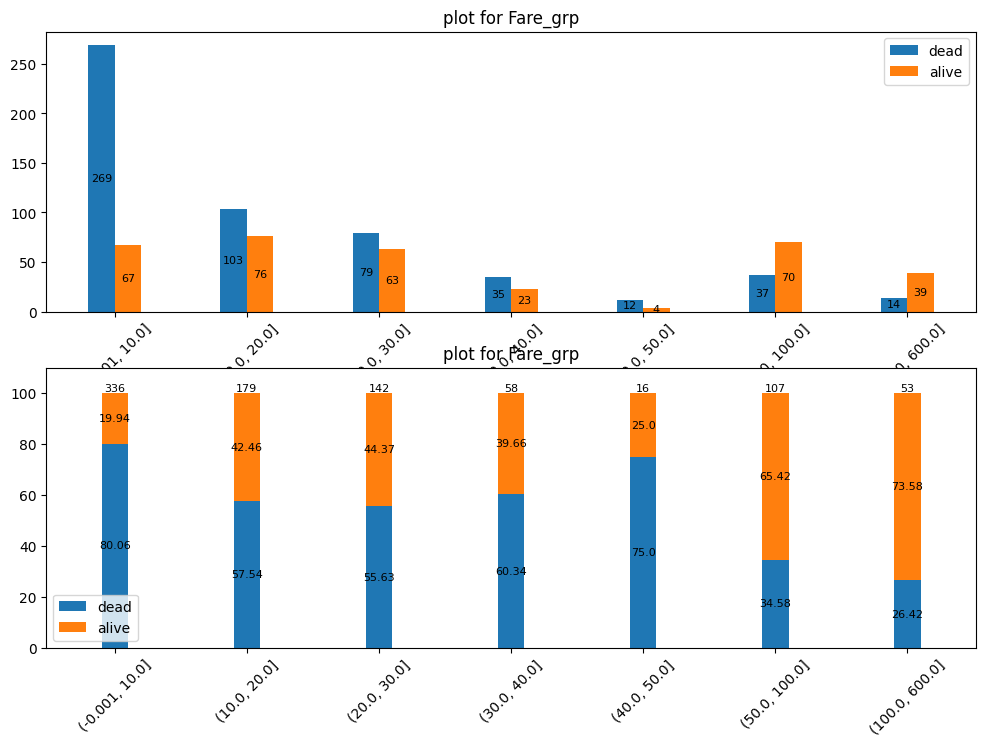

In [29]:
ep.agg_plot(df,"Fare_grp")

## Cabin
* found two many null values

In [30]:
eda_fn.summary(df,"Cabin")

unique number count of Cabin : 148

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object


In [31]:
sum(df["Cabin"].isna())

687

## Embarked


In [32]:
eda_fn.summary(df,"Embarked")

unique number count of Embarked : 4

Embarked
C      168
Q       77
S      644
NaN      2
Name: count, dtype: int64


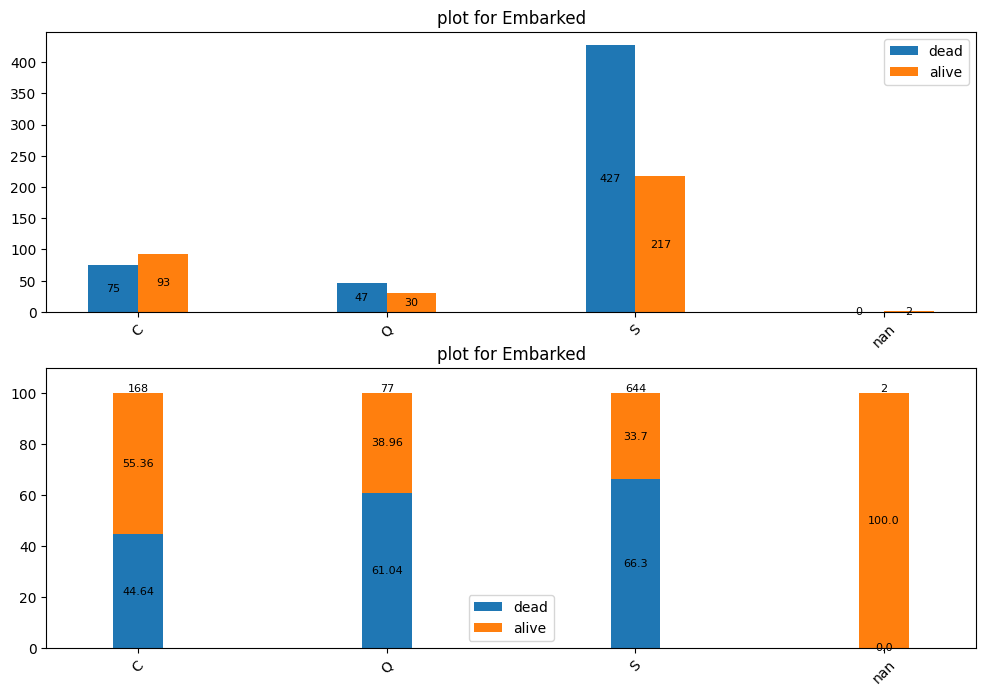

In [33]:
ep.agg_plot(df,"Embarked")

# list of features for modeling

In [34]:
feature_list = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'title', 'relatives', 'alone']

In [35]:
categorical = ['Pclass', 'Sex', 'alone', 'Embarked', 'title', 'alone']
continuous = ['Age', 'SibSp', 'Parch', 'Fare', 'relatives']
df[feature_list]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,relatives,alone
0,3,male,22.0,1,0,7.2500,S,Mr.,1,No
1,1,female,38.0,1,0,71.2833,C,Mrs.,1,No
2,3,female,26.0,0,0,7.9250,S,Miss.,0,Yes
3,1,female,35.0,1,0,53.1000,S,Mrs.,1,No
4,3,male,35.0,0,0,8.0500,S,Mr.,0,Yes
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Rev.,0,Yes
887,1,female,19.0,0,0,30.0000,S,Miss.,0,Yes
888,3,female,NaN,1,2,23.4500,S,Miss.,3,No
889,1,male,26.0,0,0,30.0000,C,Mr.,0,Yes
